<a href="https://colab.research.google.com/github/Jahan08/Ambertools-CP2K-MM-QM-Biomolecular-Simulation/blob/main/Screening%20Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
df = pd.read_excel('/content/LC_actives.xlsx')
df

,Smiles,Name
0,c1(ncccn1)N(CC2)CCN2C3CCCC3,F6543-0989
1,c1(ncccn1)N(CC2)CCN2C\C=C(/C)\C,F6667-7326
2,N(CC(CC1)CCN1c2ccncc2Cl)(C=NC(=C3)C4CC4)C3=O,F6606-1872
3,s1c(OC(C2)CO2)nnc1C3CC3,F6608-0754
4,n1(c(C)cc(C)n1)c2ncnc(C3CC3)c2,F6592-2414
...,...,...
400,C1(C(=O)\C=C\c2ccc(cc2Cl)Cl)=C(c3ccccc3)c4c(cc...,F0324-0018
401,c12n(c(cs1)C)cc(c3ccc(cc3)NC(=O)c4cc(Cl)ccc4[N...,F1897-0348
402,c12n(c(cs1)C)cc(c(cccc3NC(=O)c4cc(Cl)ccc4[N+](...,F1897-0237
403,c12n(c(cs1)C)cc(c(cccc3NC(=O)c4ccccc4I)c3)n2,F1897-0260


In [6]:
df.to_csv ("actives.sim", 
                  index = None,
                  header=True)
df = pd.DataFrame(pd.read_csv("actives.sim"))
df

,Smiles,Name
0,c1(ncccn1)N(CC2)CCN2C3CCCC3,F6543-0989
1,c1(ncccn1)N(CC2)CCN2C\C=C(/C)\C,F6667-7326
2,N(CC(CC1)CCN1c2ccncc2Cl)(C=NC(=C3)C4CC4)C3=O,F6606-1872
3,s1c(OC(C2)CO2)nnc1C3CC3,F6608-0754
4,n1(c(C)cc(C)n1)c2ncnc(C3CC3)c2,F6592-2414
...,...,...
400,C1(C(=O)\C=C\c2ccc(cc2Cl)Cl)=C(c3ccccc3)c4c(cc...,F0324-0018
401,c12n(c(cs1)C)cc(c3ccc(cc3)NC(=O)c4cc(Cl)ccc4[N...,F1897-0348
402,c12n(c(cs1)C)cc(c(cccc3NC(=O)c4cc(Cl)ccc4[N+](...,F1897-0237
403,c12n(c(cs1)C)cc(c(cccc3NC(=O)c4ccccc4I)c3)n2,F1897-0260


## A Simple Example
As an example, let's consider four molecules 

In [ ]:
buff = """NS(=O)(=O)C1=CC=C(C=C1)C1=C(C(=O)NC1=O)C1=CC=CC=C1,mol_001
CN1C(=O)C(=C(C1=O)C1=CC=C(C=C1)S(N)(=O)=O)C1=CC=CC=C1,mol_002
COC1=CC=C(C=C1)C1=C(C(=O)N(C)C1=O)C1=CC=C(C=C1)S(N)(=O)=O,mol_003
COC1=CC=C(C=C1)C1=C(C(=O)NC1=O)C1=CC=C(C=C1)S(N)(=O)=O,mol_004
"""
fs = StringIO(buff)
df = pd.read_csv(fs,names=["SMILES","Name"])
df['mol'] = df.SMILES.apply(Chem.MolFromSmiles)

In [ ]:
mols2grid.display(df,mol_col="mol",size=(200,200))

MolGridWidget()

We'll begin with the first molecule.



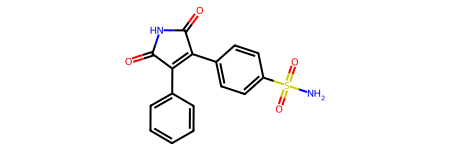

In [ ]:
m0 = df.mol.values[0]
m0

First, we'll convert the molecule to fragments.

In [ ]:
m0_frag_df = generate_fragments(m0)
m0_frag_df

,Scaffold,NumAtoms,NumRgroupgs
0,O=C1NC(=O)C(c2ccccc2)=C1c1ccccc1,19,1
1,NS(=O)(=O)c1ccc(C2=CC(=O)NC2=O)cc1,17,1
2,NS(=O)(=O)c1ccc(C2=C(c3ccccc3)C(=O)NC2=O)cc1,23,1


In [ ]:
mols2grid.display(m0_frag_df,smiles_col="Scaffold")

MolGridWidget()

For second molecule

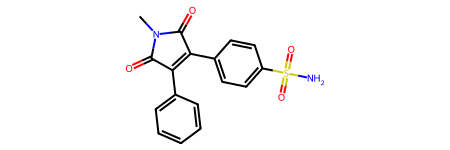

In [ ]:
m1 = df.mol.values[1]
m1

In [ ]:
m1_frag_df = generate_fragments(m1)
m1_frag_df

,Scaffold,NumAtoms,NumRgroupgs
0,NS(=O)(=O)c1ccc(C2=C(c3ccccc3)C(=O)NC2=O)cc1,23,1
1,NS(=O)(=O)c1ccc(C2=CC(=O)NC2=O)cc1,17,2
2,O=C1NC(=O)C(c2ccccc2)=C1c1ccccc1,19,2
3,CN1C(=O)C=C(c2ccc(S(N)(=O)=O)cc2)C1=O,18,1
4,CN1C(=O)C(c2ccccc2)=C(c2ccccc2)C1=O,20,1
5,CN1C(=O)C(c2ccccc2)=C(c2ccc(S(N)(=O)=O)cc2)C1=O,24,1


In [ ]:
mols2grid.display(m1_frag_df,smiles_col="Scaffold")

MolGridWidget()

Let's combine the fragments from m0 and m1 into one dataframe.

In [ ]:
m0m1_frag_df = pd.concat([m0_frag_df,m1_frag_df])

We can then use Pandas groupby to record the frequency of occurrence of each fragment.

In [ ]:
scaffold_list = []
for k,v in m0m1_frag_df.groupby("Scaffold"):
    scaffold_list.append([k,len(v),v.NumAtoms.values[0]])
scaffold_df = pd.DataFrame(scaffold_list,columns=["Scaffold","Count","NumAtoms"])

In [ ]:
scaffold_df.sort_values(["Count","NumAtoms"],ascending=[False,False],inplace=True)

The table below records the frequency of occurrence of each fragment.

In [ ]:
mols2grid.display(scaffold_df,smiles_col="Scaffold",subset=["img","Count","NumAtoms"])

MolGridWidget()

We can use the function find_scaffolds to find scaffolds in the set of four molecules above.

In [ ]:
mol_df, scaf_df = find_scaffolds(df)
mols2grid.display(scaf_df,smiles_col="Scaffold",subset=["img","Count","NumAtoms"])

  0%|          | 0/4 [00:00<?, ?it/s]

MolGridWidget()

In [ ]:
scaf_df

,Scaffold,Count,NumAtoms
10,NS(=O)(=O)c1ccc(C2=C(c3ccccc3)C(=O)NC2=O)cc1,4,23
13,O=C1NC(=O)C(c2ccccc2)=C1c1ccccc1,4,19
11,NS(=O)(=O)c1ccc(C2=CC(=O)NC2=O)cc1,4,17
6,COc1ccc(C2=C(c3ccc(S(N)(=O)=O)cc3)C(=O)NC2=O)cc1,2,25
2,CN1C(=O)C(c2ccccc2)=C(c2ccc(S(N)(=O)=O)cc2)C1=O,2,24
9,NS(=O)(=O)c1ccc(C2=C(c3ccc(O)cc3)C(=O)NC2=O)cc1,2,24
8,COc1ccc(C2=C(c3ccccc3)C(=O)NC2=O)cc1,2,21
3,CN1C(=O)C(c2ccccc2)=C(c2ccccc2)C1=O,2,20
12,O=C1NC(=O)C(c2ccc(O)cc2)=C1c1ccccc1,2,20
4,CN1C(=O)C=C(c2ccc(S(N)(=O)=O)cc2)C1=O,2,18


In [ ]:
mol_df

,Scaffold,NumAtoms,NumRgroupgs,Name,SMILES
0,O=C1NC(=O)C(c2ccccc2)=C1c1ccccc1,19,1,mol_001,NS(=O)(=O)C1=CC=C(C=C1)C1=C(C(=O)NC1=O)C1=CC=C...
1,NS(=O)(=O)c1ccc(C2=CC(=O)NC2=O)cc1,17,1,mol_001,NS(=O)(=O)C1=CC=C(C=C1)C1=C(C(=O)NC1=O)C1=CC=C...
2,NS(=O)(=O)c1ccc(C2=C(c3ccccc3)C(=O)NC2=O)cc1,23,1,mol_001,NS(=O)(=O)C1=CC=C(C=C1)C1=C(C(=O)NC1=O)C1=CC=C...
0,NS(=O)(=O)c1ccc(C2=C(c3ccccc3)C(=O)NC2=O)cc1,23,1,mol_002,CN1C(=O)C(=C(C1=O)C1=CC=C(C=C1)S(N)(=O)=O)C1=C...
1,NS(=O)(=O)c1ccc(C2=CC(=O)NC2=O)cc1,17,2,mol_002,CN1C(=O)C(=C(C1=O)C1=CC=C(C=C1)S(N)(=O)=O)C1=C...
2,O=C1NC(=O)C(c2ccccc2)=C1c1ccccc1,19,2,mol_002,CN1C(=O)C(=C(C1=O)C1=CC=C(C=C1)S(N)(=O)=O)C1=C...
3,CN1C(=O)C=C(c2ccc(S(N)(=O)=O)cc2)C1=O,18,1,mol_002,CN1C(=O)C(=C(C1=O)C1=CC=C(C=C1)S(N)(=O)=O)C1=C...
4,CN1C(=O)C(c2ccccc2)=C(c2ccccc2)C1=O,20,1,mol_002,CN1C(=O)C(=C(C1=O)C1=CC=C(C=C1)S(N)(=O)=O)C1=C...
5,CN1C(=O)C(c2ccccc2)=C(c2ccc(S(N)(=O)=O)cc2)C1=O,24,1,mol_002,CN1C(=O)C(=C(C1=O)C1=CC=C(C=C1)S(N)(=O)=O)C1=C...
0,CN1C(=O)C(c2ccc(O)cc2)=C(c2ccc(S(N)(=O)=O)cc2)...,25,1,mol_003,COC1=CC=C(C=C1)C1=C(C(=O)N(C)C1=O)C1=CC=C(C=C1...


The scaffolds above are sorted by frequency. We can look at the molecules containing the most frequently occurring scaffold by selecting the first scaffold in scaffold_df.

In [ ]:
scaffold_0 = scaffold_df.Scaffold.values[0]
scaffold_0

'NS(=O)(=O)c1ccc(C2=C(c3ccccc3)C(=O)NC2=O)cc1'

The function get_molecules_with_scaffold will return all the molecules containing the specified scaffold. This function returns two values.

* A list of scaffolds with R-group substitution points labeled
* A dataframe with molecules containing that scaffold

In [ ]:
scaffold_smiles_list= get_molecules_with_scaffold(scaffold_0, mol_df, df)

KeyError: ignored